<a href="https://colab.research.google.com/github/felipecadm/carteira-de-ativos/blob/main/Carteira_de_Ativos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -q yfinance

     |████████████████████████████████| 62 kB 1.1 MB/s 


In [2]:
import pandas as pd
import numpy as np
from pandas_datareader import data
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px 
import yfinance as yf

In [3]:
acoes = ['ENBR3.SA', 'ITSA4.SA', 'PETR4.SA', 'BOVA11.SA']
acoes

['ENBR3.SA', 'ITSA4.SA', 'PETR4.SA', 'BOVA11.SA']

In [4]:
acoes_df = pd.DataFrame()

In [5]:
for acao in acoes:
  acoes_df[acao] = yf.download(acao, start='2015-02-01')['Close']

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [6]:
acoes_df

,ENBR3.SA,ITSA4.SA,PETR4.SA,BOVA11.SA
Date,,,,
2015-02-02,8.795126,6.545879,8.790000,46.270000
2015-02-03,8.479606,6.758638,9.970000,47.639999
2015-02-04,8.321846,7.006857,10.020000,47.770000
2015-02-05,8.183806,7.006857,9.830000,47.880001
2015-02-06,8.085206,7.091960,9.120000,47.299999
...,...,...,...,...
2022-08-26,22.940001,9.350000,33.639999,108.360001
2022-08-29,22.530001,9.290000,34.480000,108.400002
2022-08-30,22.160000,9.340000,32.430000,106.400002


In [7]:
acoes_df = acoes_df.rename(columns={'ENBR3.SA': 'EDP', 'ITSA4.SA': 'ITSA', 'PETR4.SA': 'PETR', 'BOVA11.SA': 'IBOV'})

In [8]:
acoes_df

,EDP,ITSA,PETR,IBOV
Date,,,,
2015-02-02,8.795126,6.545879,8.790000,46.270000
2015-02-03,8.479606,6.758638,9.970000,47.639999
2015-02-04,8.321846,7.006857,10.020000,47.770000
2015-02-05,8.183806,7.006857,9.830000,47.880001
2015-02-06,8.085206,7.091960,9.120000,47.299999
...,...,...,...,...
2022-08-26,22.940001,9.350000,33.639999,108.360001
2022-08-29,22.530001,9.290000,34.480000,108.400002
2022-08-30,22.160000,9.340000,32.430000,106.400002


In [9]:
acoes_df.to_csv('acoes_.csv')

In [10]:
acoes_df.isnull().sum()

EDP     0
ITSA    1
PETR    0
IBOV    0
dtype: int64

In [11]:
acoes_df.to_csv('acoes.csv')

In [12]:
acoes_df.describe()

,EDP,ITSA,PETR,IBOV
count,1886.000000,1885.000000,1886.000000,1886.000000
mean,16.052861,9.260625,20.168250,81.115812
std,3.488935,2.024418,7.853613,23.697700
min,7.868286,4.910443,4.200000,36.450001
25%,13.472500,7.627705,13.575000,59.952500
50%,15.205000,9.350000,20.770000,82.174999
75%,18.959999,10.761904,27.150000,101.172499
max,24.170000,13.666666,37.230000,125.750000


In [13]:
acoes_df.columns

Index(['EDP', 'ITSA', 'PETR', 'IBOV'], dtype='object')

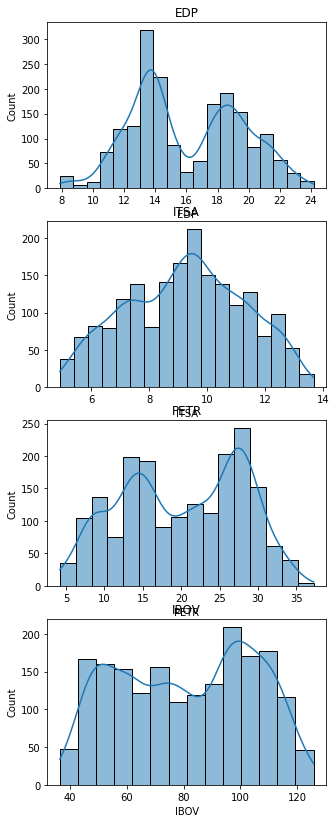

In [14]:
plt.figure(figsize=(5,25))
i = 0
for i in np.arange(0,len(acoes_df.columns)):
  plt.subplot(7, 1, i + 1)
  sns.histplot(acoes_df[acoes_df.columns[i]], kde= True)
  plt.title(acoes_df.columns[i])

In [15]:
acoes_df_normalizado = acoes_df.copy()
for i in acoes_df_normalizado.columns:
  acoes_df_normalizado[i] = acoes_df_normalizado[i] / acoes_df_normalizado[i][0]
type(acoes_df_normalizado)

pandas.core.frame.DataFrame

In [16]:
acoes_df_normalizado

,EDP,ITSA,PETR,IBOV
Date,,,,
2015-02-02,1.000000,1.000000,1.000000,1.000000
2015-02-03,0.964126,1.032503,1.134243,1.029609
2015-02-04,0.946188,1.070423,1.139932,1.032418
2015-02-05,0.930493,1.070423,1.118316,1.034796
2015-02-06,0.919283,1.083424,1.037543,1.022261
...,...,...,...,...
2022-08-26,2.608263,1.428380,3.827076,2.341906
2022-08-29,2.561646,1.419214,3.922639,2.342771
2022-08-30,2.519577,1.426852,3.689420,2.299546


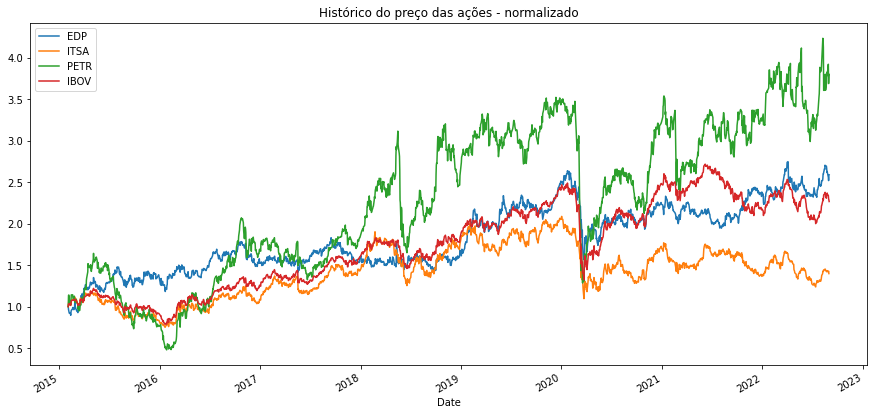

In [17]:
acoes_df_normalizado.plot(figsize = (15,7), title = 'Histórico do preço das ações - normalizado');

In [18]:
# valorização da compra até o dia atual
for ativo in acoes_df.columns:
  print(ativo, ((acoes_df[ativo][len(acoes_df) - 1] - acoes_df[ativo][0]) / acoes_df[ativo][0]) * 100)

EDP 158.89339797912857
ITSA nan
PETR 279.9772658797353
IBOV 126.71277390981237


In [19]:
# Carteira composta por ativos para efeito de comparação com índice Bovespa
acoes_df_normalizado['CARTEIRA'] = (acoes_df_normalizado['EDP'] + acoes_df_normalizado['ITSA'] + acoes_df_normalizado['PETR']) / 3
acoes_df_normalizado

,EDP,ITSA,PETR,IBOV,CARTEIRA
Date,,,,,
2015-02-02,1.000000,1.000000,1.000000,1.000000,1.000000
2015-02-03,0.964126,1.032503,1.134243,1.029609,1.043624
2015-02-04,0.946188,1.070423,1.139932,1.032418,1.052181
2015-02-05,0.930493,1.070423,1.118316,1.034796,1.039744
2015-02-06,0.919283,1.083424,1.037543,1.022261,1.013416
...,...,...,...,...,...
2022-08-26,2.608263,1.428380,3.827076,2.341906,2.621240
2022-08-29,2.561646,1.419214,3.922639,2.342771,2.634500
2022-08-30,2.519577,1.426852,3.689420,2.299546,2.545283


In [20]:
# Gráfico dinâmico 
figura = px.line(title = 'Comparativo carteira x BOVA')
for i in acoes_df_normalizado.columns[-2:]:
  figura.add_scatter(x = acoes_df_normalizado.index, y = acoes_df_normalizado[i], name = i)
figura.show()

###Retorno Anual por Ativos (Taxa Logarítica)

In [21]:
Retorno_Anual = pd.DataFrame(columns=acoes_df.columns[0:3], index=[2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022])


In [22]:
data_final = '-12-31'
for ativo in acoes_df.columns[0:3]:
  resultados = []
  for ano in Retorno_Anual.index:
    fim_ano_passado = (str(ano-1) + data_final)
    fim_ano_atual = (str(ano) + data_final)
    valor_inicio_ano = acoes_df[(acoes_df[ativo].index > fim_ano_passado) & (acoes_df[ativo].index <= fim_ano_atual)][ativo][0]
    valor_final_ano = acoes_df[(acoes_df[ativo].index > fim_ano_passado) & (acoes_df[ativo].index <= fim_ano_atual)][ativo][-1]
    resultados.append(np.log(valor_final_ano / valor_inicio_ano) * 100)
  Retorno_Anual[ativo] = resultados

In [23]:
Retorno_Anual

,EDP,ITSA,PETR
2015,29.993861,-19.622280,-27.150721
2016,18.720852,32.208342,77.218166
2017,4.380265,28.263849,9.369661
2018,3.800113,18.624252,31.509744
2019,44.374508,10.780811,22.662878
2020,-10.886583,-20.160031,-7.998844
2021,6.817459,-20.847884,-1.603936
2022,9.337971,NaN,13.816147


## Volatilidade & Retorno Diário  por Ativo

In [38]:
# taxa de retorno simples (RS) - diário
Valorização_Diária = pd.DataFrame()
for ativo in Retorno_Anual.columns:
  Valorização_Diária[ativo] = (acoes_df[ativo] / acoes_df[ativo].shift(1)) - 1


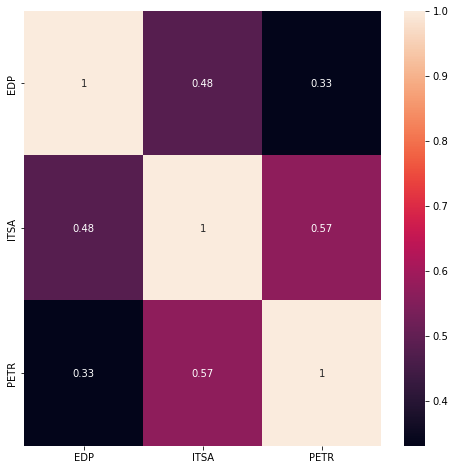

In [39]:
# correlação dos resultados das empresas - setores diferentes
plt.figure(figsize=(8,8))
sns.heatmap(Valorização_Diária.corr(), annot=True);

In [40]:
volatilidade_anual = pd.DataFrame(index=Retorno_Anual.index)
Média_Valorização_Diária = pd.DataFrame(index=volatilidade_anual.index)


    

In [41]:
for ativo in Valorização_Diária.columns[0:3]:
  for ano in volatilidade_anual.index:
    fim_ano_passado = str(ano-1) + data_final
    fim_ano_atual = str(ano) + data_final
    resultados_ano_atual = Valorização_Diária[(Valorização_Diária[ativo].index > fim_ano_passado) & (Valorização_Diária[ativo].index <= fim_ano_atual)][ativo]
    volatilidade_anual.at[ano, ativo] = resultados_ano_atual.std() * np.sqrt(252) * 100
    Média_Valorização_Diária.at[ano, ativo] = resultados_ano_atual.mean() * 100




In [42]:
volatilidade_anual

,EDP,ITSA,PETR
2015,3653.277052,3037.531789,5746.612032
2016,2839.088393,3452.480718,6399.143135
2017,2323.292478,2303.837769,3552.733706
2018,3280.681648,3280.626629,5233.525028
2019,2635.608305,2468.038422,2906.018956
2020,3960.044828,4436.674021,6845.260891
2021,2110.462326,2666.092032,4401.614555
2022,2315.559059,2184.506396,4358.348146


In [43]:
Média_Valorização_Diária

,EDP,ITSA,PETR
2015,16.009994,-6.936912,-5.672186
2016,6.459909,13.618518,40.093425
2017,2.796199,11.857760,5.683729
2018,4.221488,10.483139,19.413356
2019,17.691178,7.411265,13.195243
2020,-1.615225,-3.474260,7.215272
2021,3.453456,-7.660665,4.114470
2022,6.026054,2.387048,13.348035
